In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [106]:
def get_df(id):
    path = './' + 'CZ_27_05/' + 'unity/' + 'Shovel' + '_' + id + '.csv'
    return pd.read_csv(path)

c_0 = get_df("C0")
c_1 = get_df("C1")
c_2 = get_df("C2")
p_0 = get_df("P0")
p_1 = get_df("P1")
p_2 = get_df("P2")

c_0.head(3)

,ts_datetime,ts_unix_ms,primary_grab_hand,pt_x,pt_y,pt_z,st_x,st_y,st_z,pv_x,...,hmd_x,hmd_y,hmd_z,ee_x,ee_y,ee_z,shovel_loaded_state,cube_max_target_reached,grab_count,collision_or_load_count
0,5/27/2025 2:56:32 PM,1748350592177,Right,0.024179,0.053737,0.005668,0.043268,0.097639,0.475318,0.023872,...,0.117033,0.616599,0.264556,-2.479354e-08,0.070000,0.740000,False,0.0,1.0,0.0
1,5/27/2025 2:56:32 PM,1748350592192,Right,0.025943,0.056331,0.007002,0.042904,0.097429,0.475635,0.025564,...,0.117335,0.616929,0.264519,4.131936e-02,0.169920,0.739058,False,0.0,1.0,0.0
2,5/27/2025 2:56:32 PM,1748350592219,Right,0.029222,0.061674,0.012356,0.041531,0.097531,0.477816,0.029222,...,0.118362,0.618110,0.264620,3.901506e-02,0.167413,0.746402,False,0.0,1.0,0.0


In [ ]:
def scatter(df, title, ax):

    ptx = df["pt_x"]
    ptz = df["pt_z"]

    stx = df["st_x"]
    stz = df["st_z"]

    eex = df["ee_x"]
    eez = df["ee_z"]

    hmdx = df["hmd_x"]
    hmdz = df["hmd_z"]

    # Create a scatter plot

    alpha = 0.1

    ax.scatter(ptx, ptz, alpha=alpha)
    ax.scatter(stx, stz, alpha=alpha)
    #ax.scatter(eex, eez, alpha=alpha)
    #ax.scatter(hmdx, hmdz, alpha=alpha)

    ax.set_xlim([-1.75,0.25])
    ax.set_ylim([-0.25,1.75])

    ax.title.set_text(title)


    ax.set_xlabel('X [m]')
    ax.set_ylabel('Z [m]')

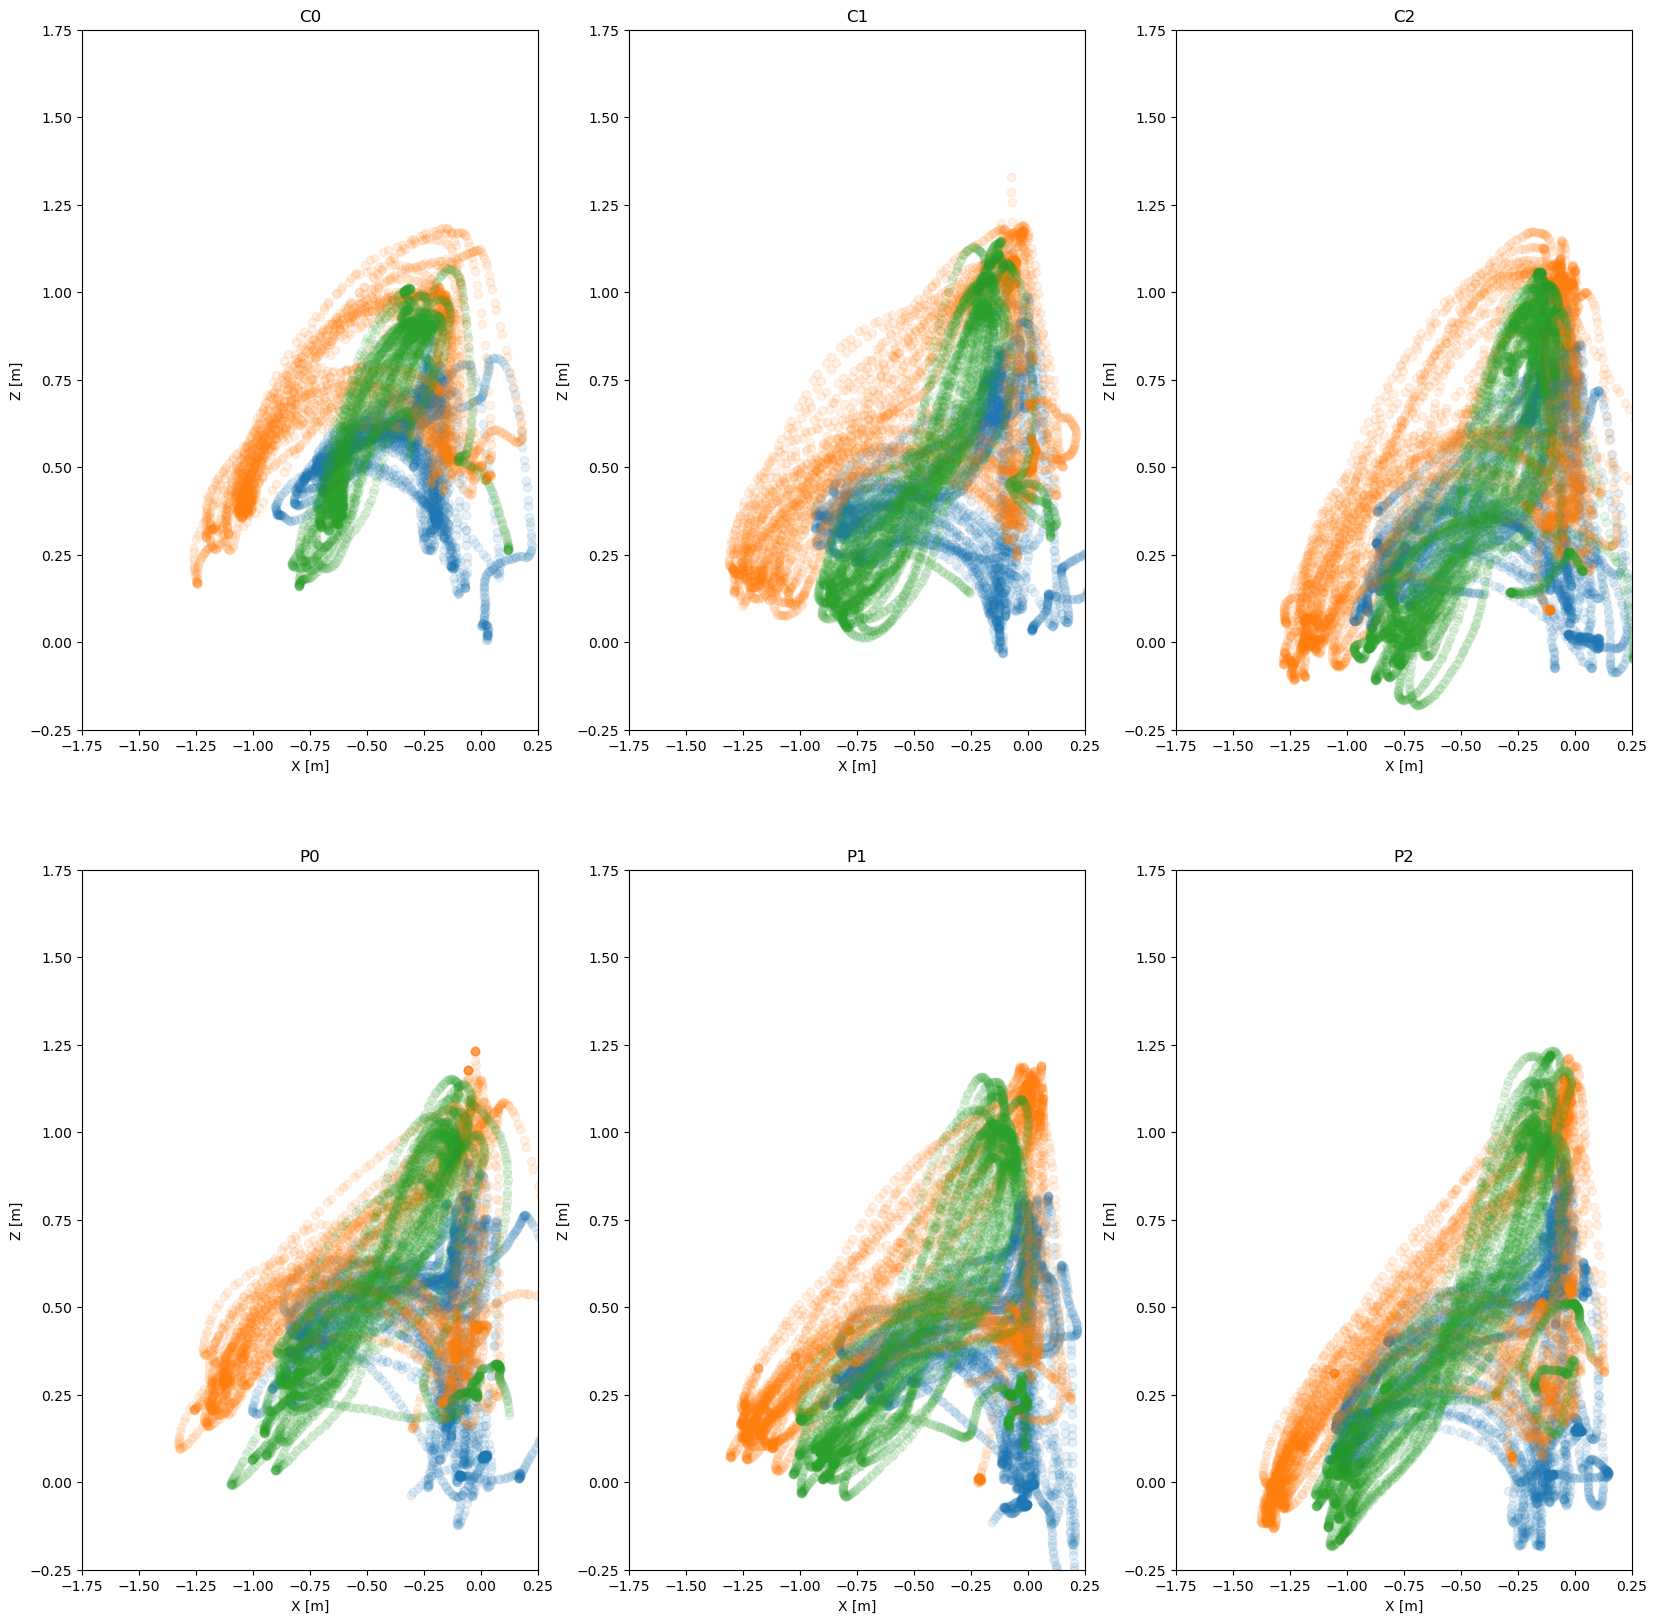

In [108]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

scatter(c_0, "C0", axs[0, 0])
scatter(c_1, "C1", axs[0, 1])
scatter(c_2, "C2", axs[0, 2])
scatter(p_0, "P0", axs[1, 0])
scatter(p_1, "P1", axs[1, 1])
scatter(p_2, "P2", axs[1, 2])

plt.show()

In [109]:
def heatmap(df, title, ax, tracking_pt):
    eex = df[tracking_pt+"_x"]
    eez = df[tracking_pt+"_z"]

    heatmap, xedges, yedges = np.histogram2d(eex, eez, bins=40, range=[[-1.75,0.25], [-0.25,1.75]])

    ax.title.set_text(title)
    # Plot the heatmap
    ax.imshow(heatmap.T, origin='lower', cmap='viridis', aspect='auto')
    

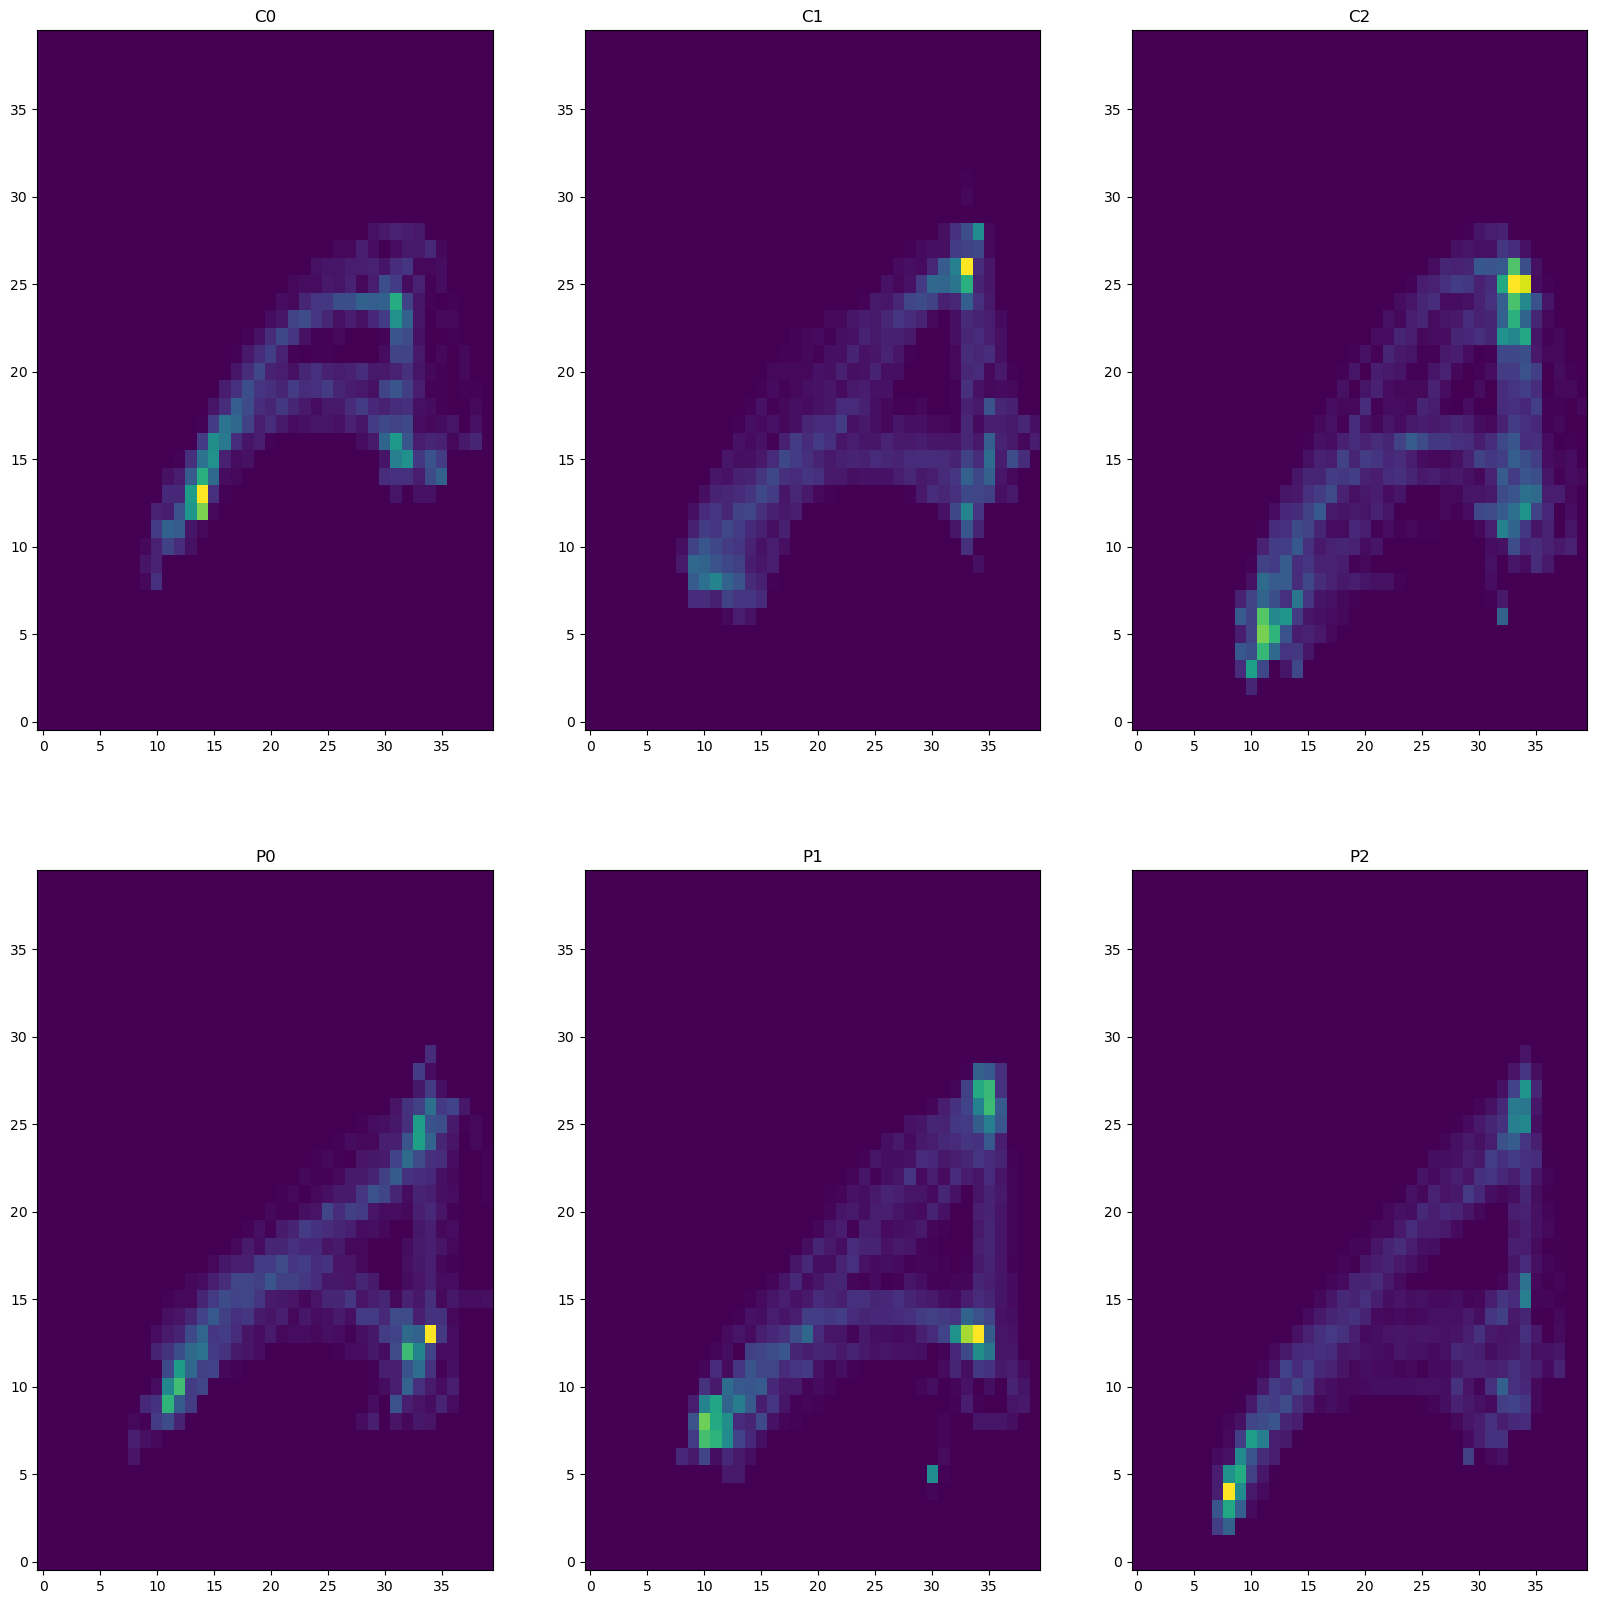

In [110]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

tracking_pt = "st"

heatmap(c_0, "C0", axs[0, 0], tracking_pt)
heatmap(c_1, "C1", axs[0, 1], tracking_pt)
heatmap(c_2, "C2", axs[0, 2], tracking_pt)
heatmap(p_0, "P0", axs[1, 0], tracking_pt)
heatmap(p_1, "P1", axs[1, 1], tracking_pt)
heatmap(p_2, "P2", axs[1, 2], tracking_pt)

plt.show()

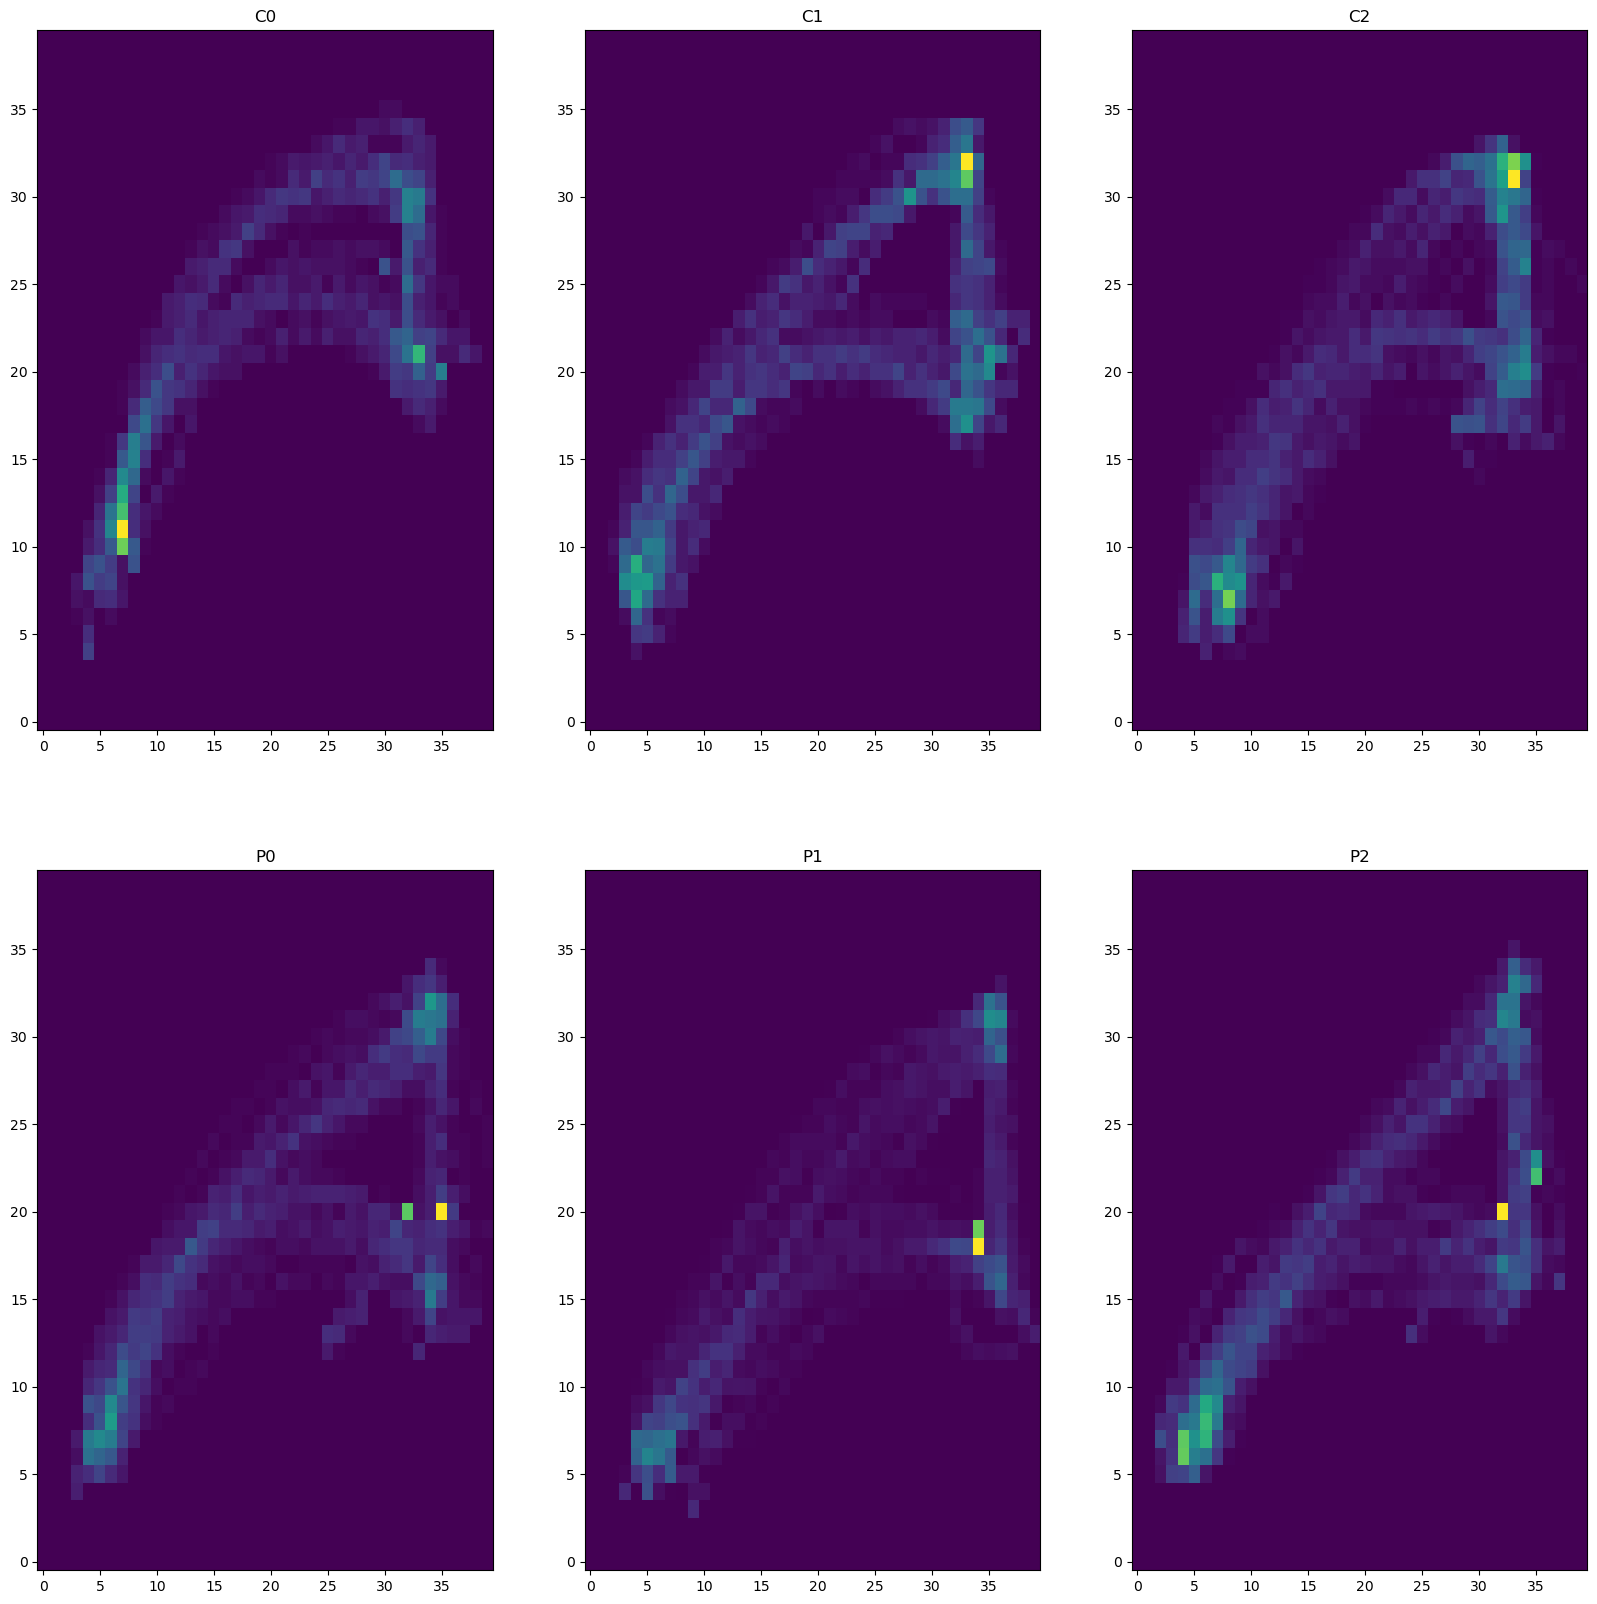

In [111]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

tracking_pt = "ee"

heatmap(c_0, "C0", axs[0, 0], tracking_pt)
heatmap(c_1, "C1", axs[0, 1], tracking_pt)
heatmap(c_2, "C2", axs[0, 2], tracking_pt)
heatmap(p_0, "P0", axs[1, 0], tracking_pt)
heatmap(p_1, "P1", axs[1, 1], tracking_pt)
heatmap(p_2, "P2", axs[1, 2], tracking_pt)

plt.show()